In [46]:
# import library
# !pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import pickle
import os

Our dataset
- person_age = Usia dari orang tersebut
- person_gender = Gender dari orang tersebut
- person_education = Tingkat pendidikan tertinggi
- person_income = Pendapatan tahunan
- person_emp_exp = Tahun pengalaman bekerja
- person_home_ownership = Status kepemilikan tempat huni
- loan_amnt = Jumlah pinjaman yang diminta
- loan_intent = Tujuan dari pinjaman
- loan_int_rate = Suku bunga pinjaman
- loan_percent_income = Jumlah pinjaman sebagai persentase dari pendapatan tahunan
- cb_person_cred_hist_length = Durasi kredit dalam tahun
- credit_score = Skor kredit dari orang tersebut
- previous_loan_defaults_on_file = Indikator tunggakan pinjaman sebelumnya
- loan_status (target variable) = Persetujuan pinjaman; 1: diterima dan 0: ditolak

# **EDA**

In [19]:
# read dataset
df = pd.read_csv("Dataset_A_loan.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

there is 5 categorical columns and 8 numerical columns

In [32]:
numerical_columns = ["person_age", "person_income", "person_emp_exp", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]
categorical_columns = ["person_gender", "person_education", "person_home_ownership", "loan_intent", "previous_loan_defaults_on_file"]
for col in columnsUnique:
  print(f"{col}: {df[col].unique()}")

person_gender: ['Female' 'Male']
person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
previous_loan_defaults_on_file: ['No' 'Yes']


## **Check Unique Value**

In [22]:
# checking missing values
def check_missing_values(df):
    result = []
    for col in df.columns:
        # count NaN
        nan_count = df[col].isnull().sum()

        # count "NA / white space / None / NULL (string)"
        na_count = (df[col] == "NA").sum()
        empty_count = (df[col] == "").sum()
        other_placeholder_count = (df[col].isin(["None", "NULL"])).sum()

        # total missing values
        total_missing = nan_count + na_count + empty_count + other_placeholder_count

        # percentage misisng values
        total_percentage = (total_missing / len(df)) * 100

        # results
        result.append({
            "Column": col,
            "NaN Count": nan_count,
            "'NA' Count": na_count,
            "Empty Strings Count": empty_count,
            "Other Placeholders Count": other_placeholder_count,
            "Total Missing (%)": total_percentage
        })
    detailed_missing_df = pd.DataFrame(result)

    # sort
    return detailed_missing_df.sort_values(by="Total Missing (%)", ascending=False)

detailed_missing_df = check_missing_values(df)
detailed_missing_df


,Column,NaN Count,'NA' Count,Empty Strings Count,Other Placeholders Count,Total Missing (%)
3,person_income,2250,0,0,0,5.0
0,person_age,0,0,0,0,0.0
1,person_gender,0,0,0,0,0.0
2,person_education,0,0,0,0,0.0
4,person_emp_exp,0,0,0,0,0.0
5,person_home_ownership,0,0,0,0,0.0
6,loan_amnt,0,0,0,0,0.0
7,loan_intent,0,0,0,0,0.0
8,loan_int_rate,0,0,0,0,0.0
9,loan_percent_income,0,0,0,0,0.0


## **Check Dimension of Dataset**

In [23]:
# dimension of dataset
dim = df.shape
print(f'The dataset has {dim[0]} rows and {dim[1]} columns')

The dataset has 45000 rows and 14 columns


# **PREPROCESSING**

In [24]:
# Drop missing value in person_income
df = df.dropna(subset=['person_income'])

## **Handle Gender Columns**

In [25]:
# mapping Male & male = Male and female & fe male = Female
df['person_gender'] = df['person_gender'].map({'Male': 'Male','male': 'Male', 'female': 'Female', 'fe male': 'Female'})

<ipython-input-25-d84b8e03be67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['person_gender'] = df['person_gender'].map({'Male': 'Male','male': 'Male', 'female': 'Female', 'fe male': 'Female'})


In [26]:
columnsUnique = ["person_gender", "person_education", "person_home_ownership", "loan_intent", "previous_loan_defaults_on_file"]
for col in columnsUnique:
  print(f"{col}: {df[col].unique()}")

person_gender: ['Female' 'Male']
person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
previous_loan_defaults_on_file: ['No' 'Yes']


## **Handle Age 21 - 70**

In [27]:
# just accept age range 21-70
df = df[(df['person_age'] >= 21) & (df['person_age'] <= 70)]

we filter the age range between 21 and 70 because the loan terms and agreement averaging only accept for people who old enough to do loan which is 21 and 70 for pension age

In [28]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,42721.000000,4.272100e+04,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000
mean,27.737600,7.990785e+04,5.382084,9590.510498,11.005122,0.139708,5.859250,632.642307,0.221624
std,5.861152,6.303681e+04,5.878085,6323.180454,2.979765,0.087093,3.865217,50.375962,0.415344
min,21.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.726200e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,602.000000,0.000000
50%,26.000000,6.705000e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.579700e+04,8.000000,12250.000000,12.990000,0.190000,8.000000,670.000000,0.000000
max,70.000000,2.448661e+06,50.000000,35000.000000,20.000000,0.660000,30.000000,784.000000,1.000000


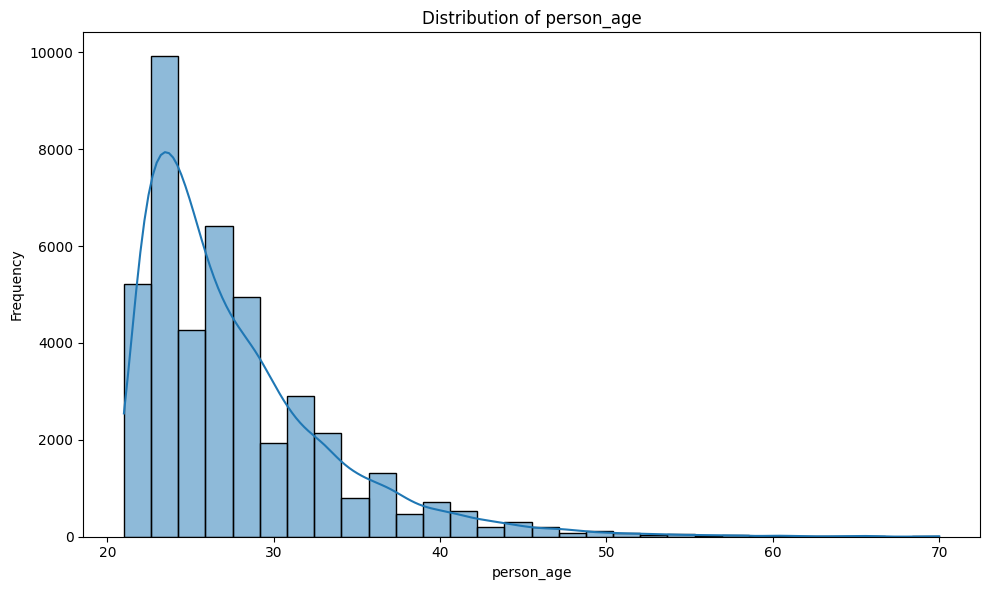

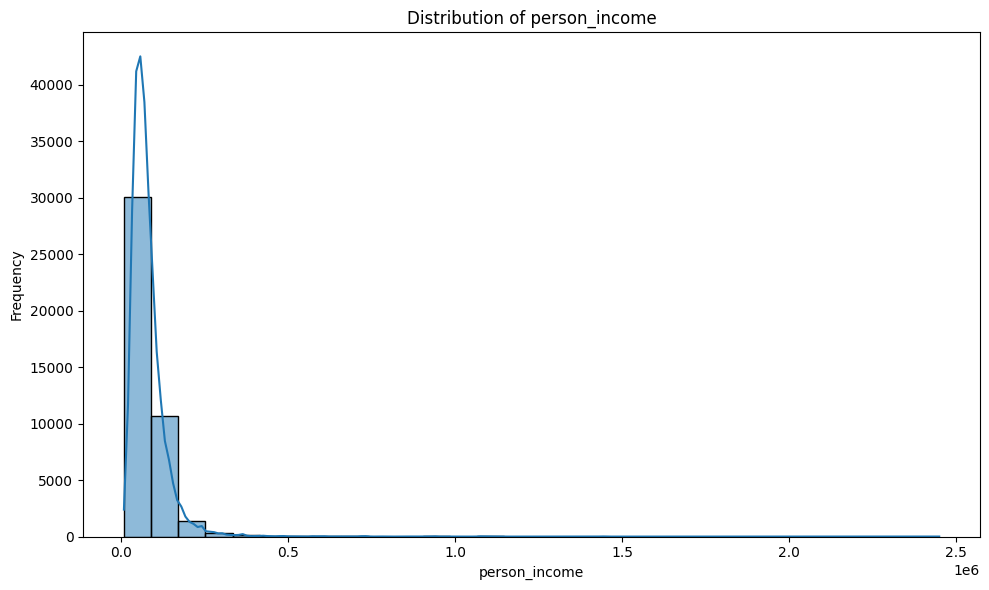

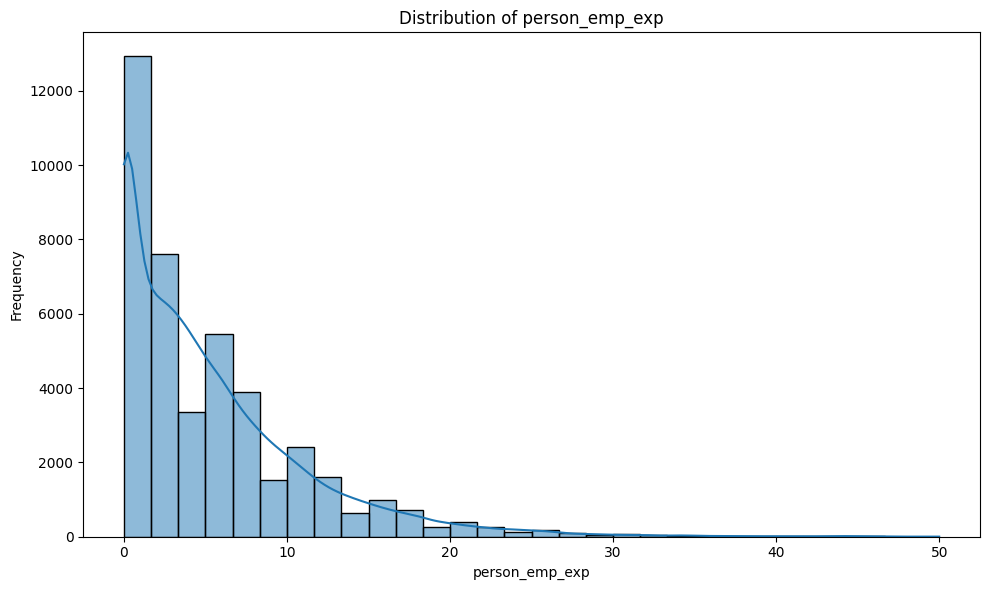

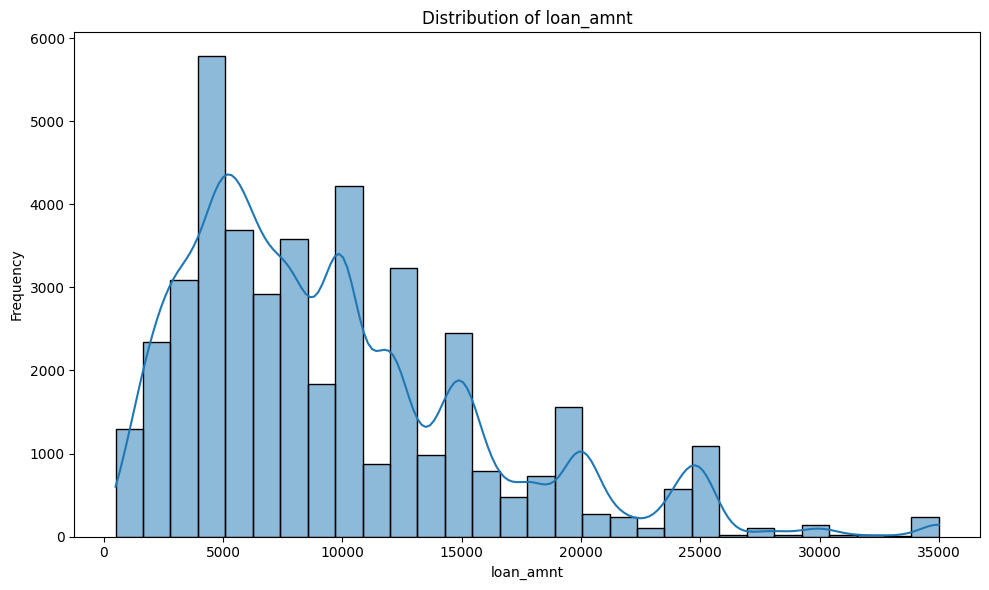

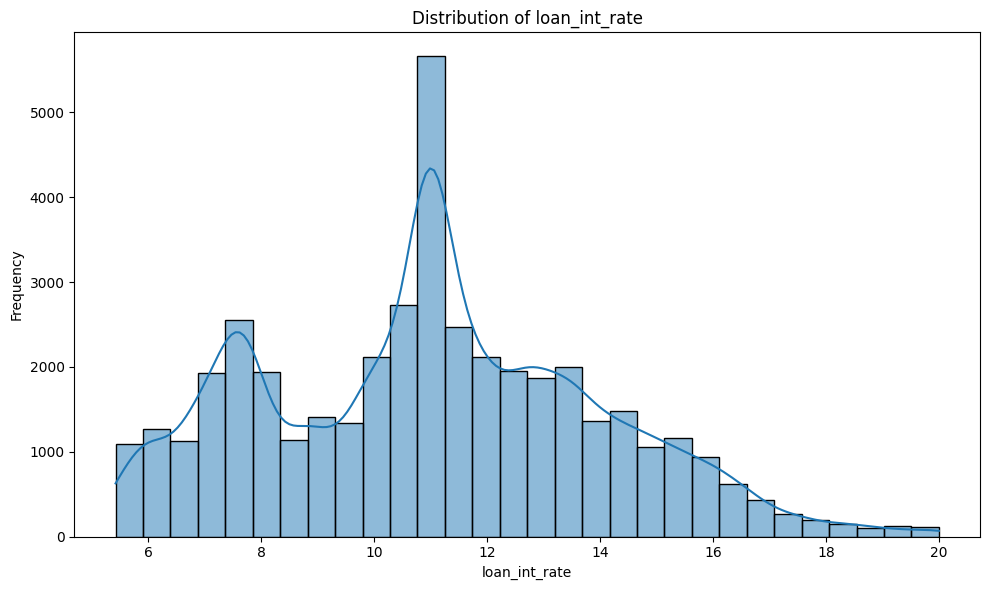

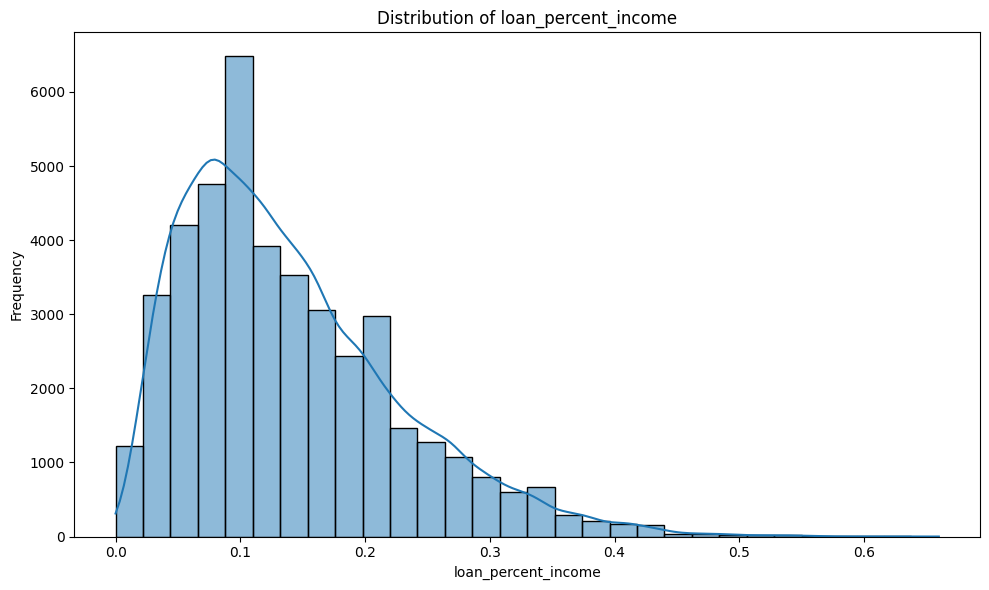

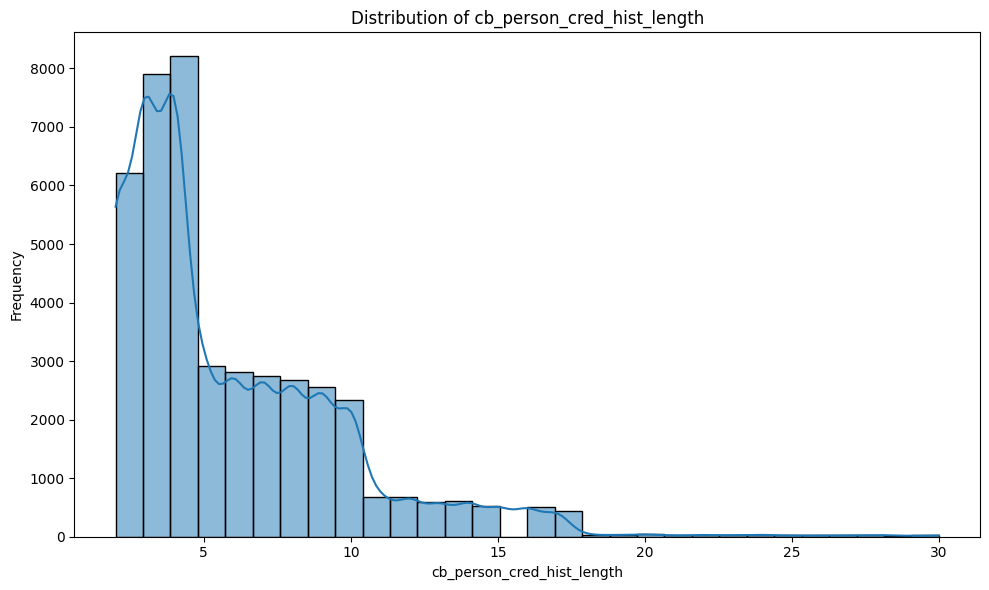

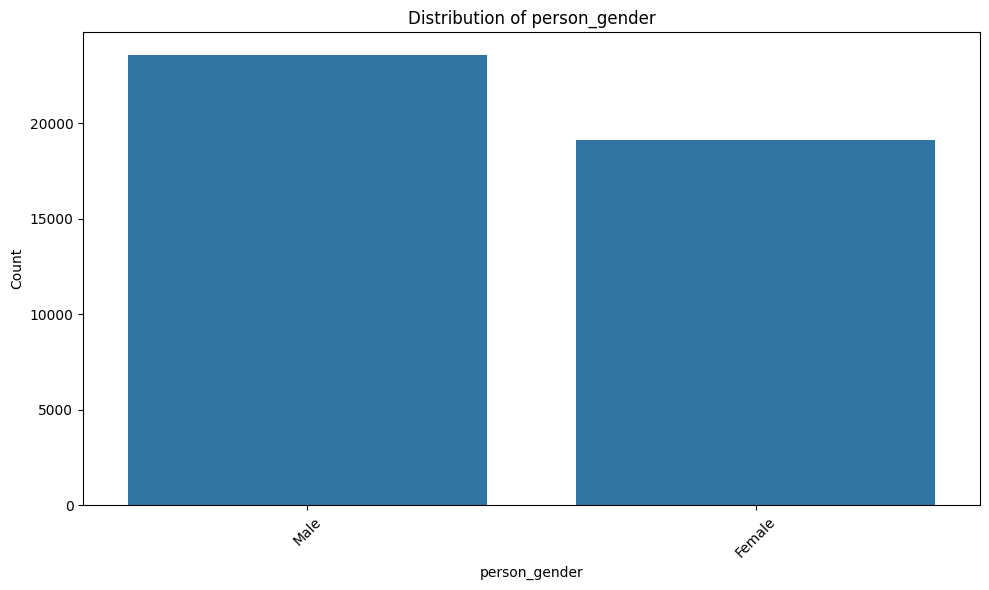

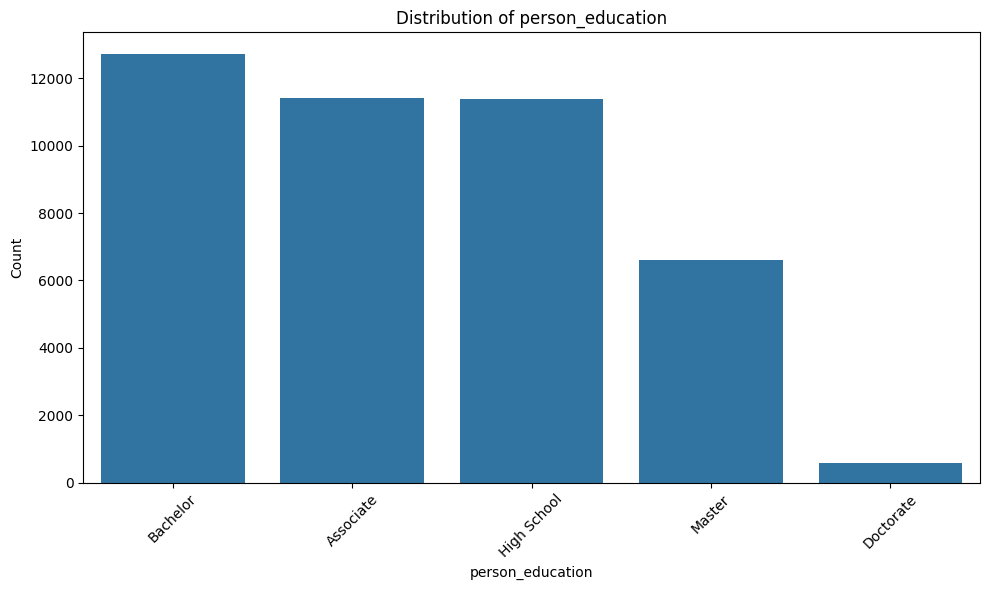

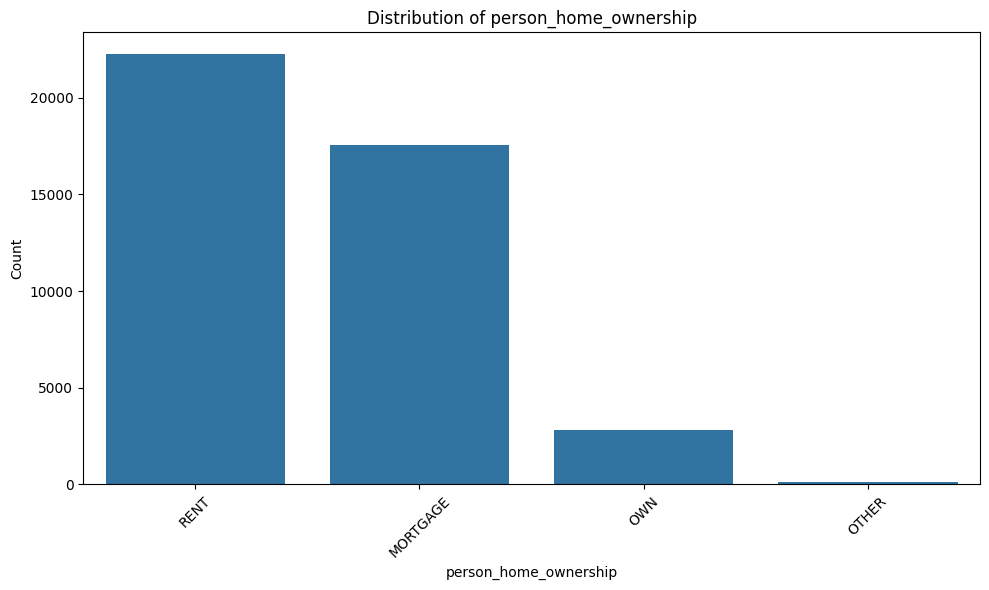

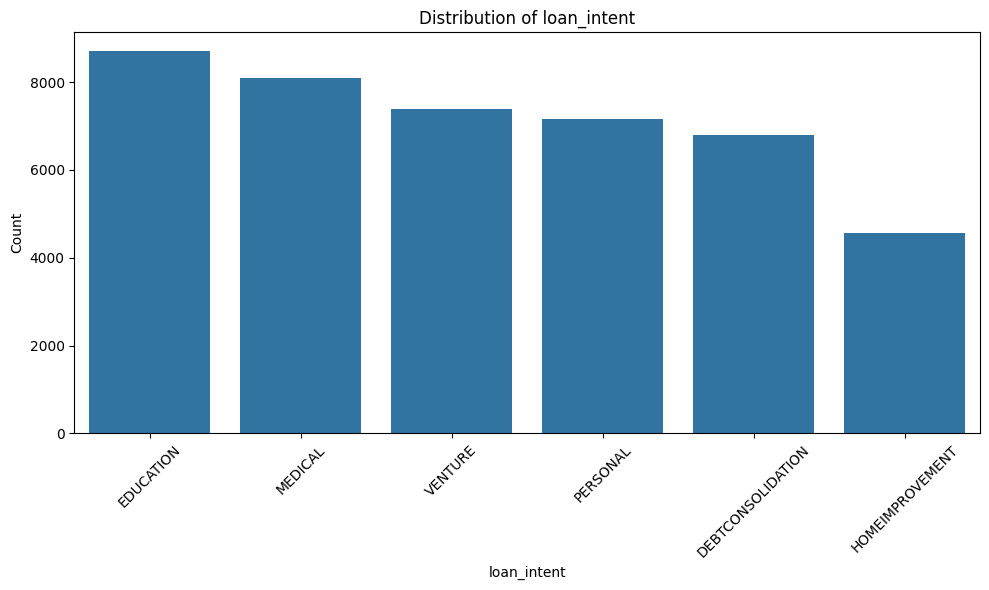

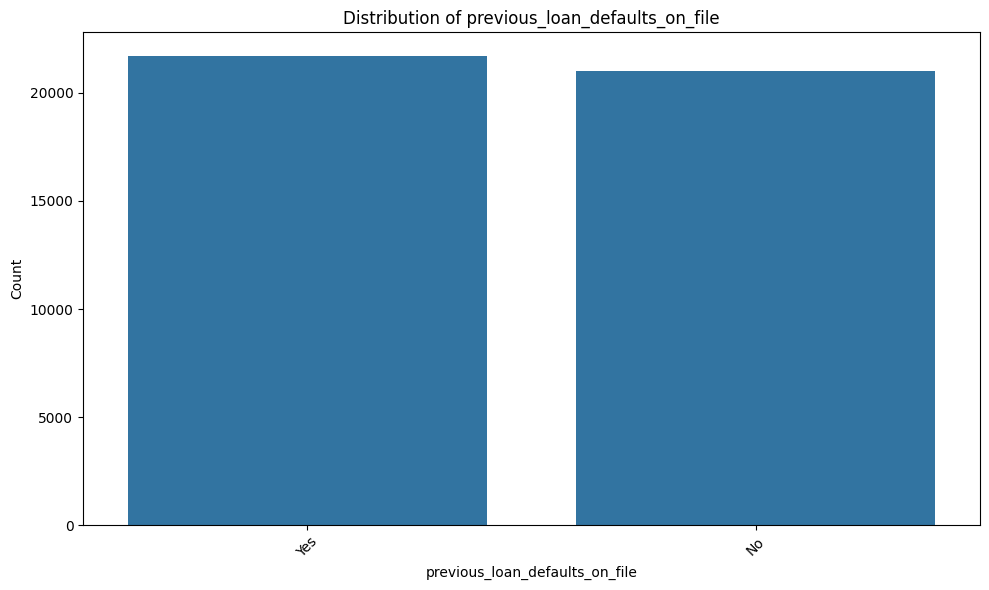

In [33]:


# Check distribution of numerical features
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Check distribution of categorical features
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


for numerical columns its likely not normally distributed so we are gonna use robust scaler and for handling all the outlier

## **Encode**

In [34]:
# using ordinal encoding
ordinal_encoder = OrdinalEncoder()
df[categorical_columns] = ordinal_encoder.fit_transform(df[categorical_columns])
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0.0,4.0,71948.0,0,3.0,35000.0,4.0,16.02,0.49,3.0,561,0.0,1
1,21.0,0.0,3.0,12282.0,0,2.0,1000.0,1.0,11.14,0.08,2.0,504,1.0,0
2,25.0,0.0,3.0,12438.0,3,0.0,5500.0,3.0,12.87,0.44,3.0,635,0.0,1
3,23.0,0.0,1.0,79753.0,0,3.0,35000.0,3.0,15.23,0.44,2.0,675,0.0,1
4,24.0,1.0,4.0,66135.0,1,3.0,35000.0,3.0,14.27,0.53,4.0,586,0.0,1


# **Splitting**

In [35]:
# split data with 80/20
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Scaling**

In [36]:
# using robust scaler
scaler = RobustScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [37]:
print(X_train)

       person_age  person_gender  person_education  person_income  \
23298    0.333333            0.0               0.0       0.151029   
4573    -0.166667            1.0               3.0       1.100915   
38625   -0.500000            0.0               3.0      -0.567825   
31067    1.666667            0.0               0.0       0.220826   
11895   -0.166667            0.0               3.0       0.543070   
...           ...            ...               ...            ...   
6604    -0.333333            1.0               0.0      -0.119922   
11903   -0.166667            0.0               1.0       0.542845   
40178    1.666667            1.0               1.0      -0.190088   
901     -0.666667            1.0               0.0      -0.373065   
16660   -0.500000            1.0               3.0       0.575796   

       person_emp_exp  person_home_ownership  loan_amnt  loan_intent  \
23298        0.285714                    0.0  -0.493151          2.0   
4573         0.285714      

scaling already done so now we are gonna go into modeling

# **Model**

## **Random Forest Model**

In [38]:
# fit model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# show prediction
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6654
           1       0.89      0.75      0.82      1891

    accuracy                           0.92      8545
   macro avg       0.91      0.86      0.88      8545
weighted avg       0.92      0.92      0.92      8545



## **Evaluate**

In [40]:
# show evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9242832065535401


In [47]:
# showing classification and confusion matrix
print(confusion_matrix(y_test, y_pred))

[[6472  182]
 [ 465 1426]]


## **XGBoost Model**

In [48]:
# fit model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [49]:
# show prediction
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6654
           1       0.88      0.81      0.84      1891

    accuracy                           0.93      8545
   macro avg       0.91      0.89      0.90      8545
weighted avg       0.93      0.93      0.93      8545



# **Evaluate**

In [50]:
# show evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9335283791691047


In [51]:
# showing classification and confusion matrix
print(confusion_matrix(y_test, y_pred))

[[6451  203]
 [ 365 1526]]


Based on the accuracy the XGBoost Model is the best model to use for later on our deployment in streamlit

# **Save in pickle format**

In [53]:
# save in pickle for for XGBoost Model
pickle.dump(xgb_model, open('xgb_model.pkl', 'wb'))